In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# File paths
TRAIN_DATADIR = '/home/kaushal/Datasets/DistractedDriverDetectionData/train/'
TEST_DATADIR = '/home/kaushal/Datasets/DistractedDriverDetectionData/test/'
TRAIN_DATA_NPY = './npy_arrays/train_data.npy'
TRAIN_DATA_COLOR_NPY = './npy_arrays/train_color_data.npy'
TEST_DATA_NPY = './npy_arrays/test_data.npy'
TEST_UNKNOWN = './datasets/testunknown'

# Categorical information
CATEGORIES = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
IMG_CATEGORIES = ['Safe Driving',
  'Texting Right' ,
  'Talking Right' , 
  'Texting Left ' ,
  'Talking Left ' ,
  'Adjust Radio/Music Player' , 
  'Drinking',
  'Reaching Behind', 
  'Hair and Makeup' , 
  'Talking to Passenger']

# Model information
IMG_SIZE = 128
LR = 1e-3
MODEL_NAME = 'Distracted_Driver_CNN' 

In [49]:
from tqdm import tqdm

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAIN_DATADIR, category) # Path to Driver Images
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_array_normalized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([img_array_normalized, class_num])
            except Exception as e:
                pass

In [50]:
create_training_data()

100%|██████████| 2129/2129 [00:02<00:00, 769.90it/s]


Talking Right


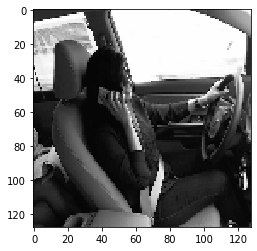

In [53]:
import random

random.shuffle(training_data)

# Test load and shuffle work
print(IMG_CATEGORIES[training_data[0][1]])
plt.imshow(training_data[0][0], cmap='gray')
plt.show()

X (22424, 128, 128, 1)
y (22424,)
x_train (15424, 128, 128, 1)
y_train (15424,)
x_validation (15424, 128, 128, 1)
y_validation (15424,)


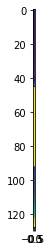

In [73]:
import numpy as np

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)   

print("X", X.shape)
print("y", y.shape)

x_train = []
y_train = []

x_validation = []
y_validation = []

train = training_data[:-7000]
validation = training_data[-7000:-1000]

for features,label in train:
    x_train.append(features)
    y_train.append(label)
    
for features,label in train:
    x_validation.append(features)
    y_validation.append(label)

# x is feature set
# y is labels
# reshape(feature set size, data size x, data size y, data size z)
# 1 in the reshape is for greyscale, replace with 3 for color image data
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

x_validation = np.array(x_validation).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_validation = np.array(y_validation)

print("x_train", x_train.shape)
print("y_train", y_train.shape)

print("x_validation", x_validation.shape)
print("y_validation", y_validation.shape)

plt.imshow(x_train[0][0])

In [72]:
import pickle

pickle_out = open("./assets/x_train.pickle", "wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("./assets/y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("./assets/x_validation.pickle", "wb")
pickle.dump(x_validation, pickle_out)
pickle_out.close()

pickle_out = open("./assets/y_validation.pickle", "wb")
pickle.dump(y_validation, pickle_out)
pickle_out.close()